In [1]:
import pandas as pd

In [2]:
combined_df = pd.read_pickle('lesson_1.pkl')

В качестве заготовки для задания прогоним часть 2ого домашнего задания. Нам необходимо получить разреженные матрицы, используя CountVectorizer, TfidfVectorizer для 'tweet_stemmed' и 'tweet_lemmatized' столбцов (4 матрицы).

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
combined_df['tweet_stemmed_sent'] = combined_df.apply(lambda row: ' '.join(row['tweet_stemmed']), axis=1)
combined_df['tweet_lemmatized_sent'] = combined_df.apply(lambda row: ' '.join(row['tweet_lemmatized']), axis=1)

In [13]:
cv_stem = CountVectorizer(max_df=0.9, max_features=1000, stop_words='english')

# Создаем the Bag-of-Words модель
bag_of_words_cv_stem = cv_stem.fit_transform(combined_df['tweet_stemmed_sent'])
feature_names_cv_stem = cv_stem.get_feature_names()

df_cv_stem = pd.DataFrame(bag_of_words_cv_stem.toarray(), columns = feature_names_cv_stem)

In [14]:
tfidf_stem = TfidfVectorizer(max_df=0.9, max_features=1000, stop_words='english')

# Создаем the Bag-of-Words модель
bag_of_words_tfidf_stem = tfidf_stem.fit_transform(combined_df['tweet_stemmed_sent'])
feature_names_tfidf_stem = tfidf_stem.get_feature_names()

df_tfidf_stem = pd.DataFrame(bag_of_words_tfidf_stem.toarray(), columns = feature_names_tfidf_stem)

In [15]:
cv_lemm = CountVectorizer(max_df=0.9, max_features=1000, stop_words='english')

# Создаем the Bag-of-Words модель
bag_of_words_cv_lemm = cv_lemm.fit_transform(combined_df['tweet_lemmatized_sent'])
feature_names_cv_lemm = cv_lemm.get_feature_names()

df_cv_lemm = pd.DataFrame(bag_of_words_cv_lemm.toarray(), columns = feature_names_cv_lemm)

In [16]:
tfidf_lemm = TfidfVectorizer(max_df=0.9, max_features=1000, stop_words='english')

# Создаем the Bag-of-Words модель
bag_of_words_tfidf_lemm = tfidf_lemm.fit_transform(combined_df['tweet_lemmatized_sent'])
feature_names_tfidf_lemm = tfidf_lemm.get_feature_names()

df_tfidf_lemm = pd.DataFrame(bag_of_words_tfidf_lemm.toarray(), columns = feature_names_tfidf_lemm)

## Задание 1.
Построим модель LogisticRegression, используя Bag-of-Words признаки для столбца combine_df['tweet_stemmed']. <br>
- Поделим Bag-of-Words признаки на train, test (train заканчивается на 31962 строке combine_df)<br>
- Ответами является столбец train_df['label']<br>
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int<br>
- Рассчитаем f1_score <br>

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [69]:
def process_LR_model(data):
    train = data[0:31962]
    X_train, X_valid, y_train, y_valid = train_test_split(train, combined_df['label'][:31962], random_state=42,
                                                          test_size=0.2, stratify=combined_df['label'][:31962])

    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    predictions_train = clf.predict_proba(X_train)
    predictions_train_bin = (predictions_train[:,1] >= 0.3) * 1
    print(f'f1 score on train = {f1_score(predictions_train_bin, y_train)}')
    
    predictions_valid = clf.predict_proba(X_valid)
    predictions_valid_bin = (predictions_valid[:,1] >= 0.3) * 1
    print(f'f1 score on valid = {f1_score(predictions_valid_bin, y_valid)}')

In [70]:
process_LR_model(df_cv_stem)

f1 score on train = 0.6474555487431024
f1 score on valid = 0.55819774718398


In [72]:
process_LR_model(df_cv_lemm)

f1 score on train = 0.6438904278239458
f1 score on valid = 0.5593008739076154


## Задание 2.
Построим модель LogisticRegression, используя TF-IDF признаки для столбца combine_df['tweet_stemmed']. <br>
- Поделим TF-IDF признаки на train, test (train заканчивается на 31962 строке combine_df) <br>
- Ответами является столбец train_df['label'] <br>
- Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int <br>
- Рассчитаем f1_score  <br>

Повторим аналогично для столбца combine_df['tweet_lemmatized'].

In [71]:
process_LR_model(df_tfidf_stem)

f1 score on train = 0.6225334182049649
f1 score on valid = 0.5572916666666666


In [73]:
process_LR_model(df_tfidf_lemm)

f1 score on train = 0.6223776223776223
f1 score on valid = 0.5614489003880984


## Задание 3.
Выведите результаты f1-score всех моделей, сделайте вывод.


У меня получились очень похожие результаты, но наблюдается тенденция, что метрика f1 хуже на трейне при лемматизации, при этом метрика на валиде такая же (даже слегка лучше) - возможно это знак того, что модели, построенные по лемматизированым токенам меньше переобучаются.

## Задание 4.
Теперь перейдем к визуализации. Посмотрим, какие слова являются наиболее популярные в датасете с помощью облака слов (WordCloud). <br>
Облако слов - это визуализация, в которой наиболее частые слова большого размера, а менее частые слова меньшего размера. <br>
- объединим слова в одну строку <br>
- создадим словарь частот слов с помощью collections.Counter <br>
- нарисуем облако слов с частотами слов с помощью WordCloud.generate_from_frequencies() <br>
- используем nltk.corpus.stopwords как параметр stopwords, чтобы убрать "мусорные" частотные слова <br>


In [85]:
import collections
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [97]:
def visualize(data):
    stopwords_set = set(stopwords.words('english'))
    words = []
    for line in data: 
        line_words = line.split()
        words.extend(line_words)

    wordfreq = collections.Counter(words)
    wordcloud = WordCloud(
     background_color='white',
     max_words=2000,
     stopwords=stopwords_set
     ).generate_from_frequencies(wordfreq)
    plt.figure(figsize=(10,9))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

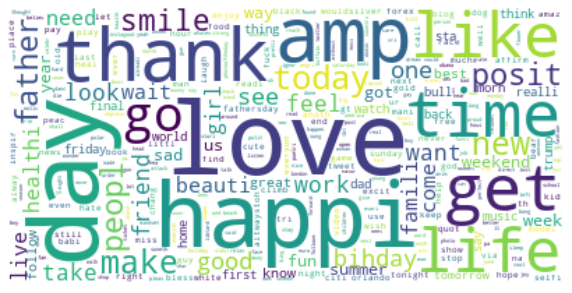

In [98]:
visualize(combined_df['tweet_stemmed_sent'])

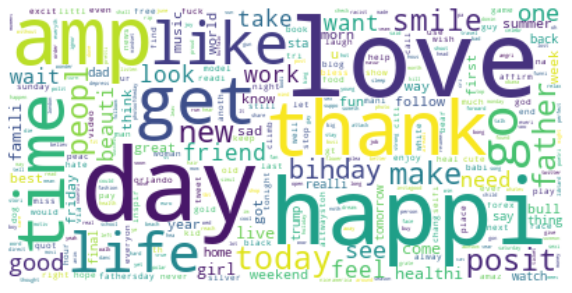

In [100]:
visualize(combined_df['tweet_lemmatized_sent'])

Похоже, что нет особого смысла выбирать между стеммизацией и лемматизацией для перед визуализацией, так что в следующих задания буду использовать лемматизацию, т.к. этот подход показал себя чуть лучше ранее.

## Задание 5.
Теперь отобразим облако слов для отзывов, не содержащих токсичных комментариев (combine_df['label'] == 0). 

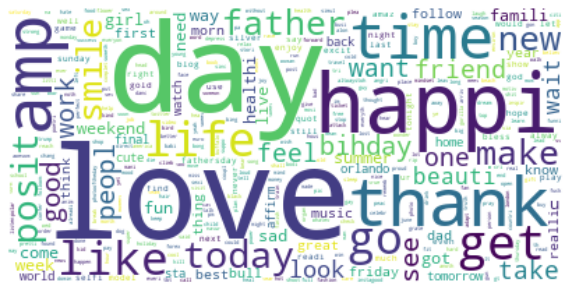

In [101]:
visualize(combined_df[combined_df['label'] == 0]['tweet_lemmatized_sent'])

## Задание 6.
Теперь отобразим облако слов для отзывов, содержащих токсичные комментарии (combine_df['label'] == 1). 

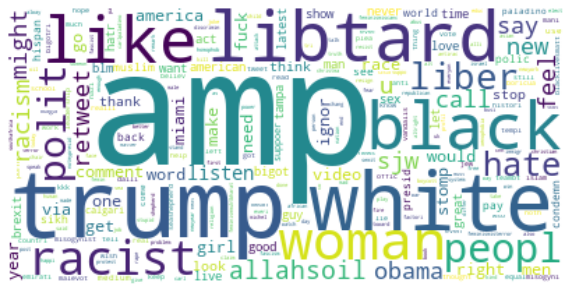

In [102]:
visualize(combined_df[combined_df['label'] == 1]['tweet_lemmatized_sent'])

Прикольный результат! Меня впечатляет, интересно будет таким способом посмотреть на другие наборы текстовые датасеты с бинарными метками.